In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tensorflow.keras.datasets.mnist as mnist

In [2]:
(xtrain_raw,ytrain_raw),(xtest_raw,ytest_raw) = mnist.load_data()


xtrain_10 = np.reshape(xtrain_raw,(len(xtrain_raw),784))
ytrain_10 = ytrain_raw
xtest = np.reshape(xtest_raw,(len(xtest_raw),784))


ytest = ytest_raw
nfeatures = 5



pca = PCA(n_components= nfeatures)
xtrain_10 = pca.fit_transform(xtrain_10)
xtest  = pca.transform(xtest) 


In [3]:
np.random.seed(seed=17)

kk = 5
mu_gmm = np.zeros((10,kk,nfeatures))
pi_gmm = np.zeros((10,kk))
s_gmm = np.zeros((10,kk,nfeatures))



iterations = 500

tol = 1e-5


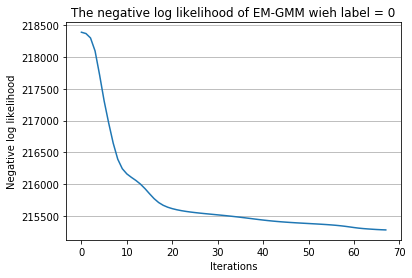

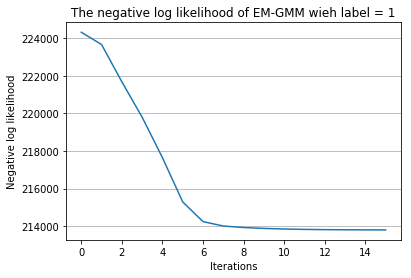

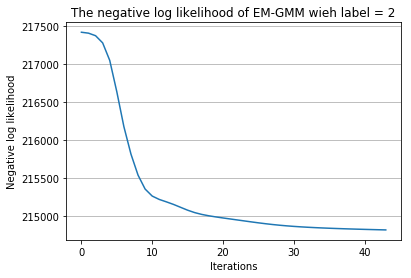

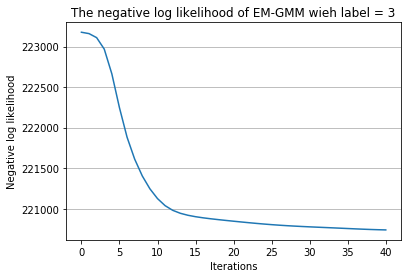

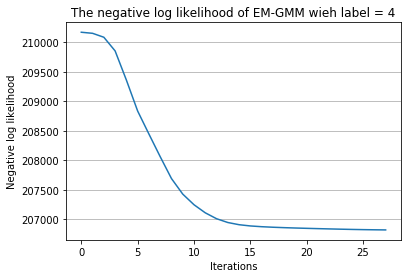

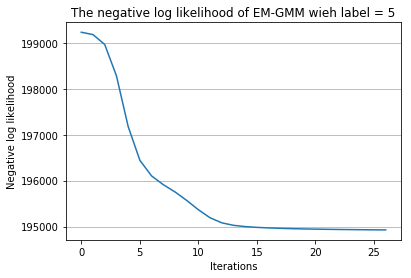

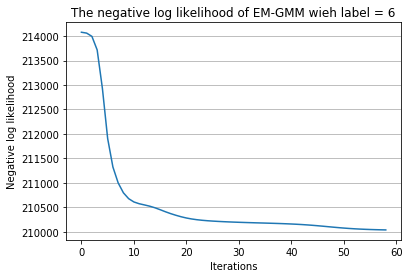

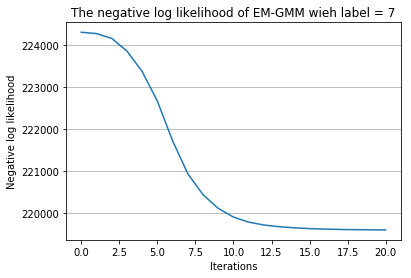

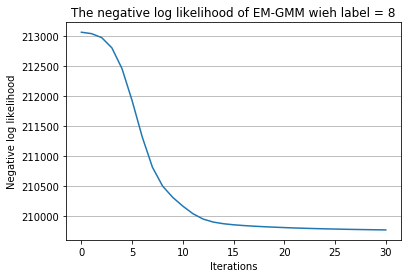

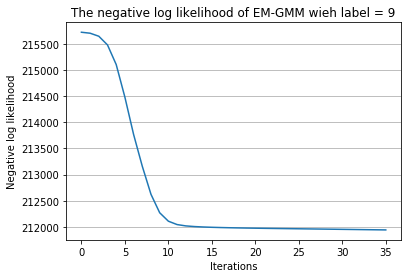

In [4]:

for xx in range(10):
    # prepare for training data points. 
    xtrain = xtrain_10[ytrain_10 ==xx]
    npoints = len(xtrain)
    
    # Initialize parameters for EM-GMM
    
    log_l = np.zeros(iterations) # Initialize negative log likelihood
    
    
    # In this assignment, the datapoints are randomly assigned into 5 Clusters
    pred = np.random.randint(kk, size=npoints)
    
    r_ik = np.zeros((npoints,kk))
    mu_k = np.zeros((kk,nfeatures))
    pi_k = np.ones(kk)
    s_k = np.ones((kk,nfeatures))
    
    # Calculate the mu, pi and s of each cluster from random assigned datapoints
    for i in range(kk):
        cluster_points = xtrain[pred ==i]
        #print(len(cluster_points))
        if len(cluster_points)>0:   
            mu_k[i] = np.mean(cluster_points,axis = 0)
            pi_k[i] = len(cluster_points)/npoints
            s_k[i]  = np.diagonal(np.cov(cluster_points.T))

            

    ## Start EM Iteration
    
    count = 0
    while (count < iterations) :
        
        ## E step
        
        for i in range(kk):
       
            r_ik[:,i] = pi_k[i]*((2*np.pi)**nfeatures*np.prod(s_k[i]))**(-0.5)*np.exp(np.sum(-0.5*(xtrain-mu_k[i])**2/s_k[i],axis =1 ))
    
    
        ri = np.sum(r_ik,axis = 1)
        for i in range(kk):
            r_ik[:,i] = r_ik[:,i]/ri
                     
        log_l[count] = -np.sum(np.log(ri))
        
        # Compare negative Log Likelihood with previous one
        if count>0: 
            if abs(log_l[count]-log_l[count-1])<=tol*abs(log_l[count]):
                
                break
    
           
        ## M step 
        
        # Update mu, pi and s for each cluster
        
        rk =  np.sum(r_ik,axis = 0)
        pi_k = rk/npoints 
        
        for i in range(kk):
            
            mu_k[i] = np.sum(xtrain*r_ik[:,i].reshape(-1,1)/rk[i],axis = 0)
            s_k[i]  = np.sum(xtrain**2*r_ik[:,i].reshape(-1,1),axis = 0)/rk[i] - mu_k[i]**2  
            
        count+=1
    
    # Store mu, pi and s for datapoints with label 0-9
    mu_gmm[xx] = mu_k
    pi_gmm[xx] = pi_k
    s_gmm[xx]   = s_k
    plt.plot(log_l[0:count])
    plt.title('The negative log likelihood of EM-GMM wieh label = '+str(xx))
    plt.xlabel('Iterations')
    plt.ylabel('Negative log likelihood')
    plt.grid(axis = 'y')
    plt.show()
    
    
    
    
    
    
    
    
    

In [5]:
prob = np.zeros((len(ytest),10))
for xx in range(10):
    mu_k =mu_gmm[xx]
    pi_k = pi_gmm[xx]
    s_k  = s_gmm[xx]
    r_ik = np.zeros((len(ytest),kk))
    for i in range(kk):
        r_ik[:,i] = pi_k[i]*np.prod((2*np.pi)**nfeatures*s_k[i])**(-0.5)*np.exp(np.sum(-0.5*(xtest-mu_k[i])**2/s_k[i],axis =1 ))
    prob[:,xx] = np.sum(r_ik,axis = 1)
         
pred = np.argmax(prob, axis = 1) == ytest
acc = np.sum(pred)/len(ytest)        
         
print('The   accuracy of EM-GMM with K = 5 is %.3f%% '%(acc*100) )
print('The error rate of EM-GMM with K = 5 is %.3f%% '%((1-acc)*100) )


The   accuracy of EM-GMM with K = 5 is 72.570% 
The error rate of EM-GMM with K = 5 is 27.430% 


In [6]:
aa = np.array([[1,2,3],[4,5,6]])

In [8]:
aa.flatten()

array([1, 2, 3, 4, 5, 6])